### IMPORTING LIBRARY

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

### READING THE DATASET

In [2]:
df = pd.read_csv('datasets/urban_data.csv')
# df

### NUMBER OF HOUSES
- Taking the average family size of 4 people in India, the total population can be divided by 4 to get an approximate number of families in India, which will be equal to the number of houses required.


In [3]:
df['No of houses(lakhs)'] = df['Population(cr)'] / 4 * 100
# df

### POPULATION AREA
- Dividing the city into 3 significant sections:

    - Green Area
    - Population Area (Residential area and other important places)
    - Smart Area (Companies)

- Giving each section 1/3rd of the total area of the city.


In [4]:
df['Population Area(sq km)'] = df['Actual Area(sq km)'] * 0.33
# df

### GREEN AREA

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6209905/

https://www.witpress.com/Secure/elibrary/papers/SDP16/SDP16031FU1.pdf (Page 2)

- There should be 9 m2 of green area per individual in every city.


In [5]:
df['Green Area(sq km)'] = ((df['Population(cr)'] * 10000000) * 9) / 1000000 
# df

### SMART AREA
- Taking on average, 1 out of every 3 people work in MNCs in India, there are over 470M employees for a 130cr population of India.


https://www.google.com/search?q=population+of+india&rlz=1C1ONGR_enIN930IN930&oq=population+of+india&aqs=chrome..69i57j0i20i131i263i433i512j0i67j0i131i433i512j0i512j0i67j0i131i433i512j0i67j0i512l2.4704j1j7&sourceid=chrome&ie=UTF-8


https://www.ceicdata.com/en/indicator/india/employed-persons


- Taking an average of 500 employees in each company,


https://www.bizjournals.com/bizjournals/on-numbers/scott-thomas/2012/07/16055-companies-fit-the-definition-of.html


- The total working class can be divided into companies and then multiplied by each company size.


- Company size = 0.03 sq. km (Taking Microsoft Noida’s Campus size as an example)

https://www.microsoft.com/en-in/msidc/delhi-campus.aspx


In [6]:
df['Smart Area(sq km)'] = ((df['Population(cr)'] * 10000000 / 3) / 500 ) * 0.03
# df

## AREA DISTRIBUTION 

### NATIONAL BUILDINGS
- Taking Courts, embassies and every other building which are of importance to the country can be allocated and built within this area, which will be counted under the population area only. Giving 6% of the total area of the city to this zone. Taking Railway stations’ area, airport’s area and the high court of Delhi as examples to calculate this.

In [7]:
df['National Buildings(sq km)'] = df['Actual Area(sq km)'] * 0.06
# df

### RESIDENTIAL AREA
- Average height of a telecom tower = Height of each apartment = 131ft (40m)

https://www.trai.gov.in/sites/default/files/Rec_Infrastructurel.pdf ,Pg 27, 1.49 section.

- Average height of a floor (including everything) = 14ft

https://theskydeck.com/how-tall-is-a-storey-in-feet/

- Dividing them to get 9 floors in each building,
- Number of houses on each floor (3 bhk) = 3
- Number of houses in each apartment = 27

- Number of people accommodated = 27*4 = 108

- Number of apartments needed = Population / 108

- Size of each floor = 500 m2

- Total residential area = ((Population/108) *500) / 1000000) sq. km


In [8]:
df['Residential Area(sq km)'] = (((df['Population(cr)'] * 10000000 / 108 ) * 500 ) / 1000000 )
# df

### EDUCATIONAL AREA
- Taking kids born every year in each city as the variable.
- Students in each batch in each school = 700 (DPS R.K Puram)
- Total number of schools required = Kids born every year / Students in each batch in each school

- Area of a school = 49000 m2 (DPS R.K. Puram)

https://en.wikipedia.org/wiki/Delhi_Public_School,_R._K._Puram

- Total educational area then can be calculated by multiplying total number of schools required in a city with the area of each school, then multiplying this number by 2 ( allotting colleges the same area) then adding 1.5 sq. km for educational coaching institutes like Aakash.


In [9]:
df['Educational Area(sq km)'] = (((((df['Birth Rate(lakhs/year)'] * 100000) / 700) * 49000) / 1000000) * 2) + 1.5
# df

### LOCAL MARKET
- Allocating 2% of the total area of the city, which will include local markets and different kinds of eatery markets. Deciding 0.001 sq. km per shop.


In [10]:
df['Local Market(sq km)'] = df['Actual Area(sq km)'] * 0.02
# df

### EMERGENCIES
- According to the WHO standards, there should be 3 beds per 1000 people in a city, which comes down to 1 bed per 333 people. So, taking the whole population and dividing it with 333 will give the number of beds required in a city. 

https://health.economictimes.indiatimes.com/news/industry/the-new-healthcare-policy-mandates-a-minimum-of-2-beds-per-1000-sumeet-aggarwal/62992210

- Number of beds in AIIMS Delhi= 2478= Number of beds in a hospital

- Total number of hospitals = Total number of beds required in a city / Number of beds in a hospital

- Area of AIIMS = Area of each hospital = 1.335 sq. km

- Therefore, the area for emergency services can be calculated by multiplying the number of hospitals required by the area of each hospital and then multiplying this number by 3, each for hospitals, fire stations and police stations. Also including extra services like NCW in this.


In [11]:
df['Emergencies(sq km)'] = ((((df['Population(cr)'] * 10000000 ) / 333 ) / 2478 ) * 1.335 ) * 3
# df

### MISCELLANEOUS
- Subtracting the population area with the sum of areas of National Buildings, Residential Area, Educational Area, Local Markets and Emergencies will give us the space left for other activities and constructions like roads.

- Taking Delhi, Bangalore and Hyderabad as examples, this area should be more than 29 sq. km.

- *Special case*: Mumbai was falling below 29 sq. km and coming with -64.97 sq. km as the miscellaneous area, so the computer used our algorithm to increase the number of floors in each apartment to decrease the number of apartments in the city and hence decreasing the residential area, therefore increasing the miscellaneous area bringing it to 45.65 sq. km.


In [12]:
df['Miscellaneous(sq km)'] = df['Population Area(sq km)'] - df.iloc[:,-5:].sum(axis = 1)
# df

In [13]:
df['Building Height(ft)'] = 131
# df

### ERROR HANDLING

In [14]:
df['error_green_area'] = df['Actual Area(sq km)'] - ( df['Population Area(sq km)'] + df['Green Area(sq km)'] + df['Smart Area(sq km)'])
# df

In [15]:
pos_error_green = df[df['error_green_area'] >= 0]
pos_error_green['Green Area(sq km)'] += pos_error_green['error_green_area']
# pos_error_green

In [16]:
neg_error_green = df[df['error_green_area'] < 0]
neg_error_green['Miscellaneous(sq km)'] -= neg_error_green['error_green_area']
# neg_error_green

In [17]:
df = pd.concat([pos_error_green, neg_error_green], axis = 0)
# df

In [18]:
df.drop('error_green_area', axis = 1, inplace = True)
# df

In [19]:
positive_misc = df[df['Miscellaneous(sq km)'] > 20]
error_misc = df[df['Miscellaneous(sq km)'] < 20]
building_height = 131
floor_height = 14
while error_misc['Miscellaneous(sq km)'].values < 20: 
    building_height += floor_height
    if building_height > 320:
        print("ALERT")
        break
    else:
        no_floors = building_height // floor_height
        no_houses_each_apt = no_floors * 3
        no_people_acc = no_houses_each_apt * 4
        error_misc['Residential Area(sq km)'] = (((error_misc['Population(cr)'] * 10000000 / no_people_acc) * 500) / 1000000)
        error_misc['Miscellaneous(sq km)'] = error_misc['Population Area(sq km)'] - error_misc.iloc[:,-7:-2].sum(axis = 1)
        error_misc.drop(['Building Height(ft)'], axis=1)
        error_misc['Building Height(ft)'] = building_height

ALERT


### MERGING THE ERROR DATAFRAME WITH THE ACTUAL DATAFRAME

In [20]:
# error_misc

In [21]:
# positive_misc

In [22]:
df = pd.concat([positive_misc, error_misc], axis = 0)
# df = df[df['Miscellaneous(sq km)'] > 29]
df

,City,Terrain,Actual Area(sq km),Population(cr),Altitude(m),Birth Rate(lakhs/year),No of houses(lakhs),Population Area(sq km),Green Area(sq km),Smart Area(sq km),National Buildings(sq km),Residential Area(sq km),Educational Area(sq km),Local Market(sq km),Emergencies(sq km),Miscellaneous(sq km),Building Height(ft)
0,Delhi,Aravali,1483.0,1.68,239,2.87,42.00,489.390,657.61,336.0,88.980,77.777778,41.68,29.660,81.539166,169.753056,131
1,Hyderabad,Hills,650.0,0.68,536,1.14,17.00,214.500,299.50,136.0,39.000,31.481481,17.46,13.000,33.003948,80.554570,131
2,Bangalore,Plateau,741.0,0.96,920,1.31,24.00,244.530,304.47,192.0,44.460,44.444444,19.84,14.820,46.593809,74.371746,131
3,Mumbai,Plains,603.4,1.80,14,0.38,45.00,199.122,162.00,360.0,36.204,83.333333,6.82,12.068,87.363392,91.055274,131
4,Ranchi,Plateau,175.0,0.29,651,0.57,7.25,57.750,59.25,58.0,10.500,5.492424,9.48,3.500,14.075213,14.702363,313


### EXPORTING THE DATAFRAME 

In [23]:
df.to_csv('data.csv', index = False)

## ZOONING THE CITIES FOR RESIDENTIAL, COMMERCIAL and INDUSTRIAL AREAS

### DELHI

In [24]:
delhi = pd.read_csv('datasets/Delhi-Population.csv')
# delhi.head()

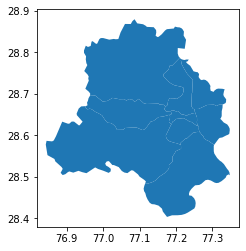

In [25]:
delhi_file_path = 'MAPS/Delhi/Districts.shp'
delhi_map = gpd.read_file(delhi_file_path)
delhi_map.plot();

In [26]:
## delhi_map = borough_map.rename(columns={'NAME': 'Area Name'})
# delhi_map

In [27]:
delhi_merged = delhi_map.set_index('DISTRICT').join(delhi.set_index('District'))
# delhi_merged

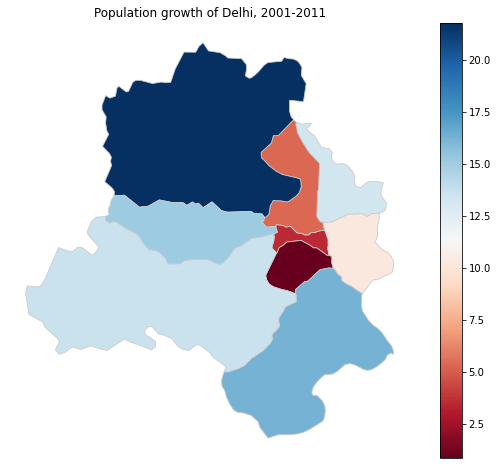

In [28]:
feature = delhi_merged['Growth Rate(%)']
vmin, vmax = min(delhi_merged['Growth Rate(%)']), max(delhi_merged['Growth Rate(%)'])
fig, ax = plt.subplots(1, figsize=(10, 8))
delhi_merged.plot(column=feature, cmap='RdBu',linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Population growth of Delhi, 2001-2011')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm);

### MUMBAI

In [29]:
mumbai = pd.read_csv('datasets/mumbai.csv', encoding_errors= 'replace')
mumbai = mumbai.iloc[:24]
# mumbai

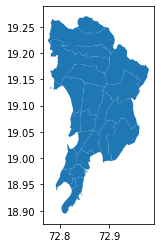

In [30]:
bmo_file_path = 'MAPS/Mumbai/ward_level/mumbai_wards.geojson'
bmo_map = gpd.read_file(bmo_file_path)
# borough_map.to_file('file.shp') 
bmo_map.plot();

In [31]:
bmo_map = bmo_map.rename(columns={'name': 'Ward'})
# bmo_map

In [32]:
bombay = bmo_map.set_index('Ward').join(mumbai.set_index('Ward'))

In [33]:
# bombay

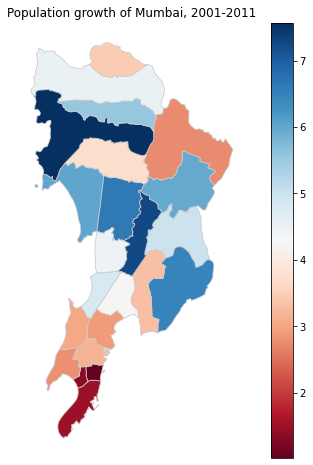

In [34]:
feature = bombay['Population Growth Rate(%)']
vmin, vmax = min(bombay['Population Growth Rate(%)']), max(bombay['Population Growth Rate(%)'])
fig, ax = plt.subplots(1, figsize=(10, 8))
bombay.plot(column=feature, cmap='RdBu',linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Population growth of Mumbai, 2001-2011')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm);

### BANGALORE

In [35]:
bangalore = pd.read_csv('datasets/bangalore.csv')
bangalore['District'] = bangalore['Ward Name']
bangalore.drop('Ward Name', axis = 1, inplace = True)

In [36]:
# bangalore

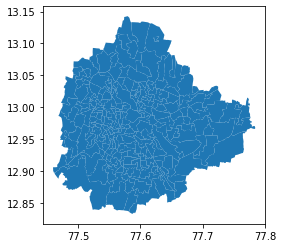

In [37]:
bglr_file_path = 'MAPS/Bangalore/BBMP.geojson'
bglr_map = gpd.read_file(bglr_file_path)
# borough_map.to_file('file.shp')
bglr_map.plot();

In [38]:
bglr_map = bglr_map.rename(columns={'KGISWardName': 'District'})
# bglr_map['District'] = bglr_map['District'].apply(lambda x : x.split())
# bglr_map

In [39]:
bglr_merged = bglr_map.set_index('District').join(bangalore.set_index('District'))
# bglr_merged

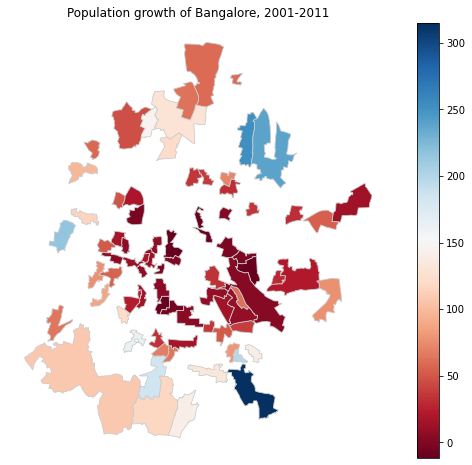

In [40]:
feature = bglr_merged['Popn growth rate (%) 2001 - 2011']
vmin, vmax = min(bglr_merged['Popn growth rate (%) 2001 - 2011']), max(bglr_merged['Popn growth rate (%) 2001 - 2011'])
fig, ax = plt.subplots(1, figsize=(10, 8))
bglr_merged.plot(column=feature, cmap='RdBu',linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Population growth of Bangalore, 2001-2011')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm);

### HYDERABAD 

In [41]:
hyderabad = pd.read_excel('datasets/hyderabad.xlsx')

In [42]:
hyderabad = hyderabad.iloc[:150]
# hyderabad

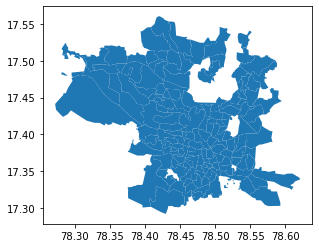

In [43]:
hyd_file_path = 'MAPS/Hyderabad/ghmc-wards.geojson'
hyd_map = gpd.read_file(hyd_file_path)
# borough_map.to_file('file1.shp')
hyd_map.plot();

In [44]:
hyd_map = hyd_map.rename(columns={'name': 'District'})
hyd_map['District'] = hyd_map['District'].apply(lambda x : x.split()[2])
# hyd_map

In [45]:
hyd_merged = hyd_map.set_index('District').join(hyderabad.set_index('Ward_Name'))
# hyd_merged

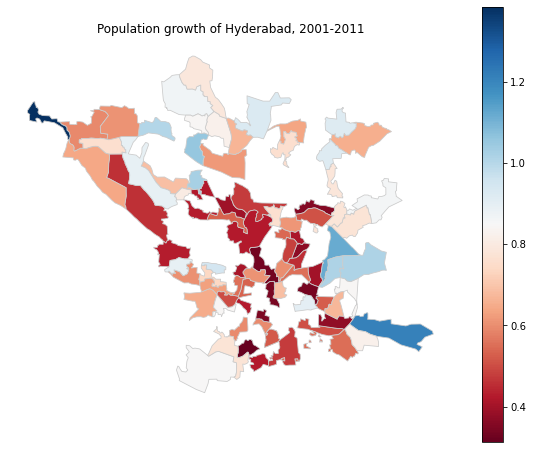

In [46]:
feature = hyd_merged['Growth Rate(%)']
vmin, vmax = min(hyd_merged['Growth Rate(%)']), max(hyd_merged['Growth Rate(%)'])
fig, ax = plt.subplots(1, figsize=(10, 8))
hyd_merged.plot(column=feature, cmap='RdBu',linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Population growth of Hyderabad, 2001-2011')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm);

## AREA DISTRIBUTION CHART

In [47]:
col = df.columns

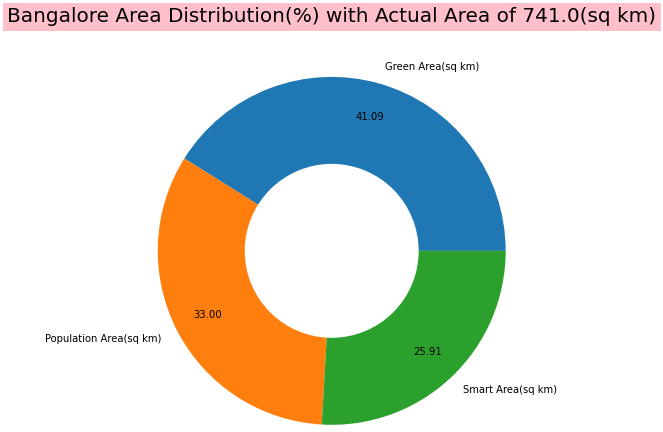

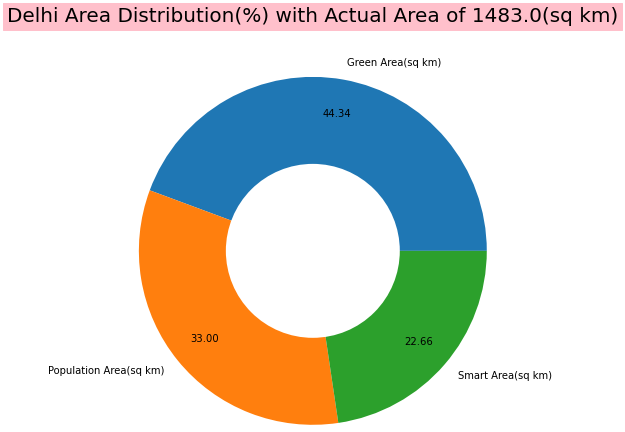

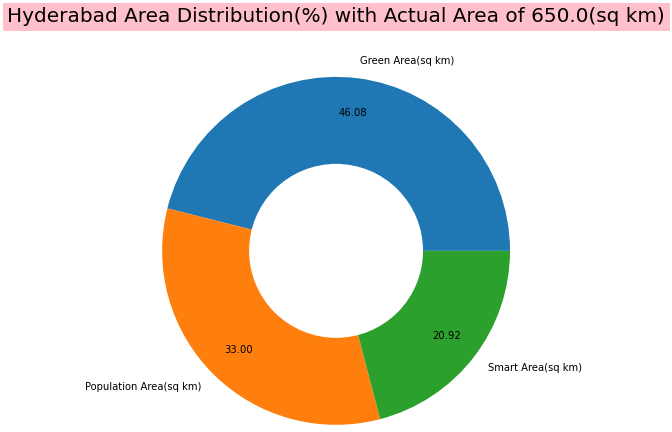

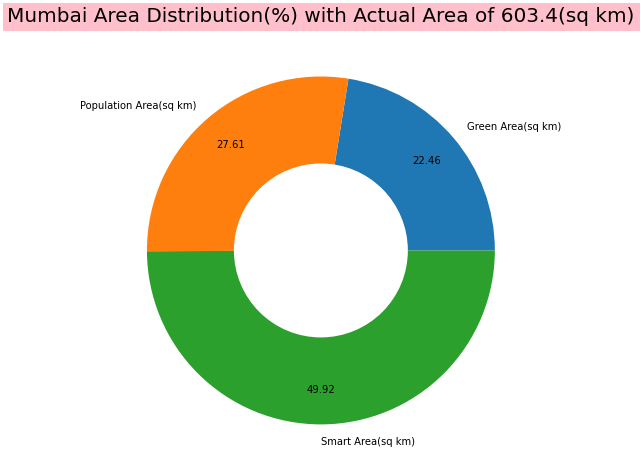

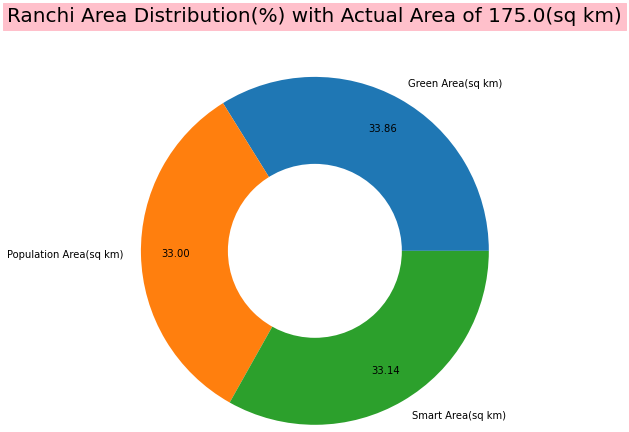

In [48]:
actual_area_col = col[7:10]
pivot_actual_area_df = pd.pivot_table(data = df, values = actual_area_col, columns = ['City'])

pivot_actual_area_col = pivot_actual_area_df.columns
for i in range(len(pivot_actual_area_col)):
    plt.pie(labels = pivot_actual_area_df.index, x = pivot_actual_area_df[pivot_actual_area_col[i]], autopct = '%.2f',
           pctdistance = 0.8, labeldistance = 1.1, radius = 2)
    centre_circle = plt.Circle((0, 0), 1, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title('{0} Area Distribution(%) with Actual Area of {1}(sq km)'.format(df[df['City'] == pivot_actual_area_col[i]]['City'].iloc[0],
            df[df['City'] == pivot_actual_area_col[i]]['Actual Area(sq km)'].iloc[0]), pad = '120', 
              fontsize = 20, backgroundcolor='pink', loc = 'center')
    print()
    plt.show()
    print()
    print()

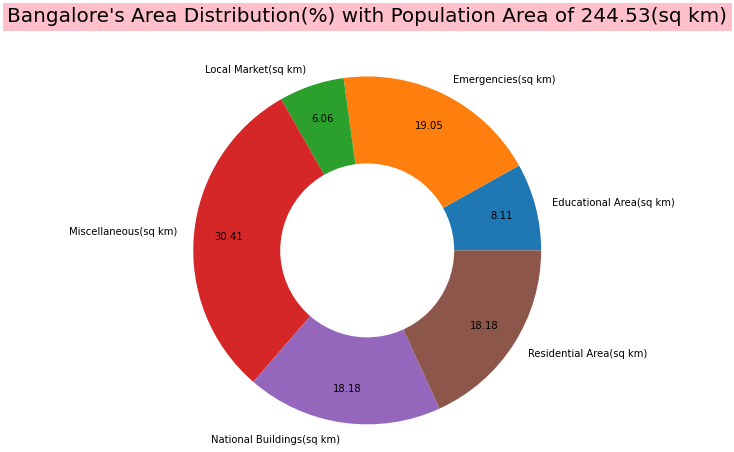

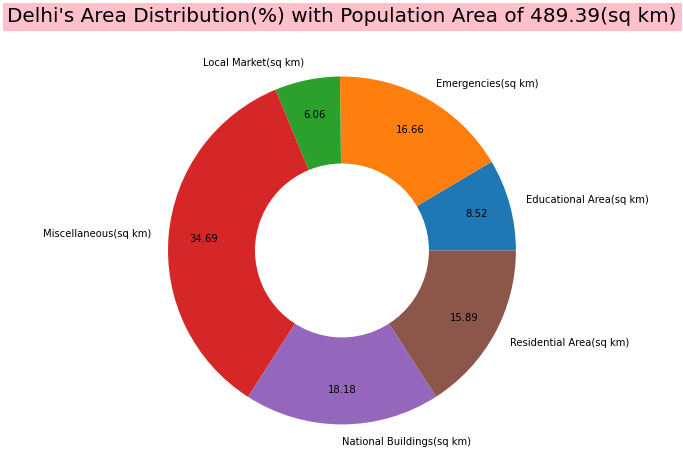

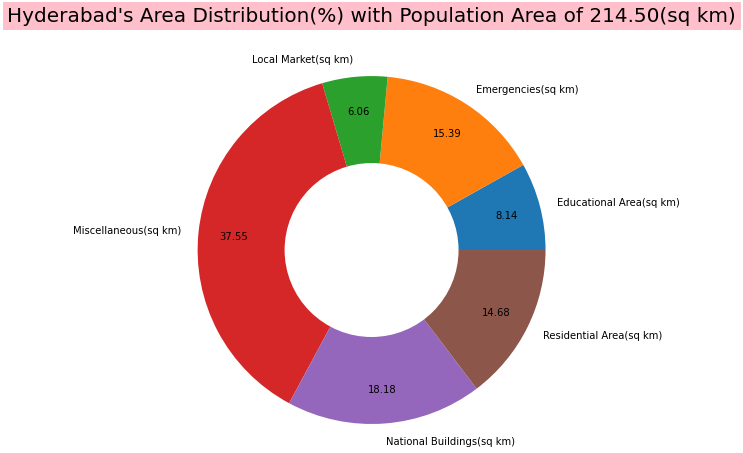

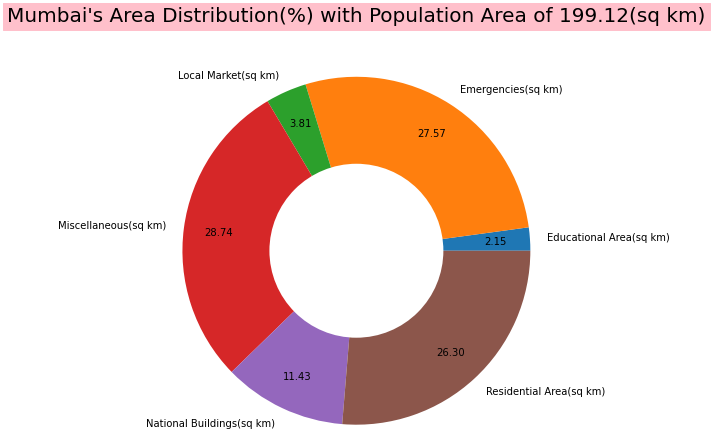

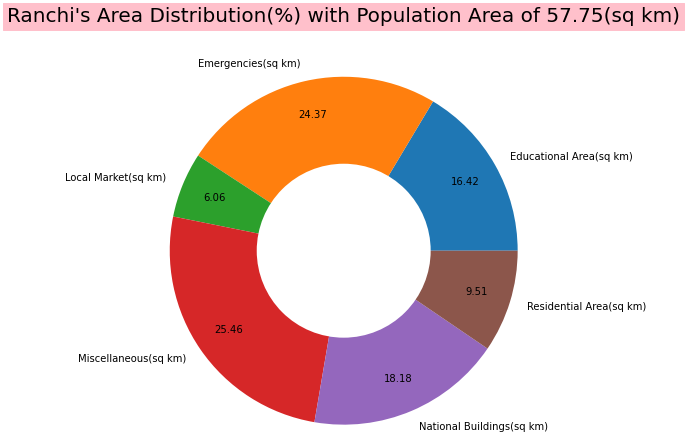

In [49]:
pop_area_col = col[10:-1]
pivot_pop_area_df = pd.pivot_table(data = df, values = pop_area_col, columns = ['City'])

pivot_pop_area_col = pivot_pop_area_df.columns
for i in range(len(pivot_pop_area_col)):
    plt.pie(labels = pivot_pop_area_df.index, x = pivot_pop_area_df[pivot_pop_area_col[i]], autopct = '%.2f',
           pctdistance = 0.8, labeldistance = 1.1, radius = 2)
    centre_circle = plt.Circle((0, 0), 1, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title("{0}'s Area Distribution(%) with Population Area of {1:.2f}(sq km)".format(df[df['City'] == pivot_pop_area_col[i]]['City'].iloc[0],
            df[df['City'] == pivot_pop_area_col[i]]['Population Area(sq km)'].iloc[0]),
              pad = '120', fontsize = 20, backgroundcolor='pink')
    print()
    plt.show()
    print()
    print()

# 